In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping

In [5]:
path = "E:/Thesis/images/"
train_path = path + "train/"
val_path = path + "val/"
test_path = path + "test/"

In [6]:
effusion = glob.glob(train_path+"effusion/*.png")
atelectasis = glob.glob(train_path+"atelectasis/*.png")

In [7]:
number_of_effusion_img = len(effusion)
number_of_atelectasis_img = len(atelectasis)
print("number of effusion images:", number_of_effusion_img)
print("number of atelectasis images:", number_of_atelectasis_img)

number of effusion images: 2500
number of atelectasis images: 2500


In [8]:
train_val_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train = train_val_generator.flow_from_directory(train_path,
                                               batch_size=20,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

Found 5000 images belonging to 2 classes.


In [10]:
val = train_val_generator.flow_from_directory(val_path,
                                               batch_size=20,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42)

Found 999 images belonging to 2 classes.


In [11]:
test = test_generator.flow_from_directory(test_path,
                                          batch_size=20,
                                          target_size=(220,220),
                                          color_mode="rgb",
                                          class_mode="binary")

Found 1000 images belonging to 2 classes.


### ResNet50 with "Adam" optimiser

In [12]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adam = Sequential()

resnet_adam.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adam.add(Flatten())

resnet_adam.add(Dense(units = 128, activation = "relu"))
resnet_adam.add(Dropout(0.5))

resnet_adam.add(Dense(units = 1, activation = "sigmoid"))

94683136/94668760 [==============================] - 0s 0us/step


In [13]:
resnet_adam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
resnet_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


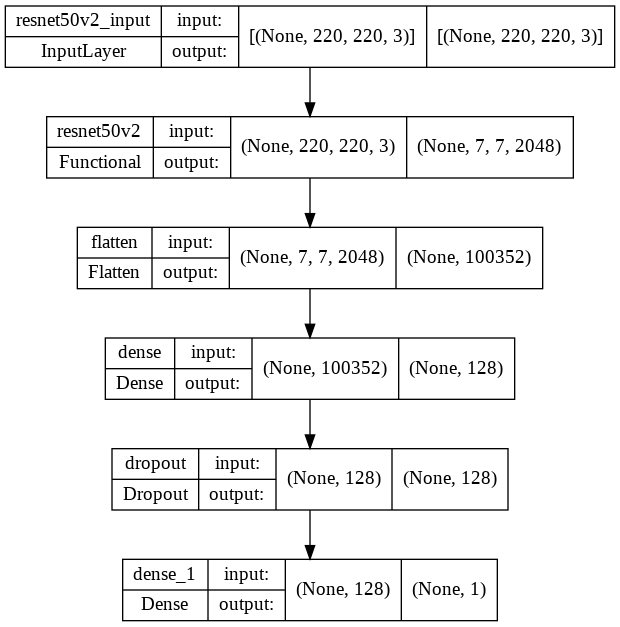

In [14]:
tf.keras.utils.plot_model(resnet_adam, to_file='resnet_adam.png', show_layer_names=True, show_shapes=True)

In [15]:
hist = resnet_adam.fit(train, validation_data=val, epochs=5)


Epoch 1/5
250/250 [==============================] - 1552s 6s/step - loss: 1.3969 - accuracy: 0.5686 - val_loss: 0.6532 - val_accuracy: 0.6567
Epoch 2/5
250/250 [==============================] - 98s 392ms/step - loss: 0.6322 - accuracy: 0.6248 - val_loss: 0.5949 - val_accuracy: 0.6897
Epoch 3/5
250/250 [==============================] - 98s 391ms/step - loss: 0.5966 - accuracy: 0.6514 - val_loss: 0.6311 - val_accuracy: 0.6336
Epoch 4/5
250/250 [==============================] - 98s 391ms/step - loss: 0.5594 - accuracy: 0.6914 - val_loss: 0.5909 - val_accuracy: 0.6997
Epoch 5/5
250/250 [==============================] - 97s 389ms/step - loss: 0.5220 - accuracy: 0.7032 - val_loss: 0.5984 - val_accuracy: 0.6847


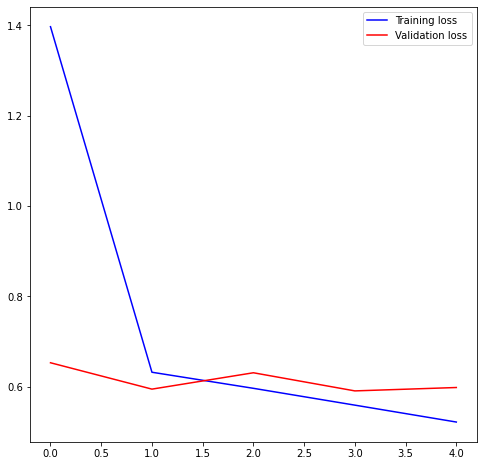

<Figure size 432x288 with 0 Axes>

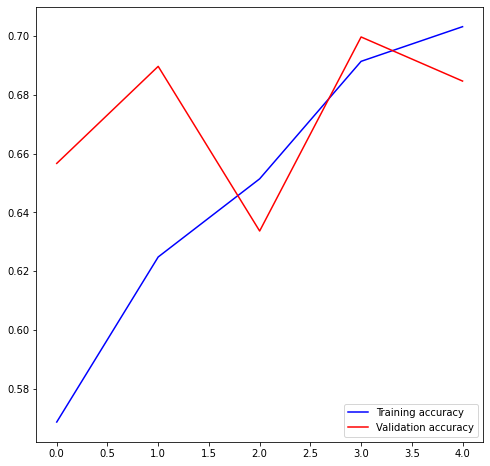

In [16]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [17]:
test_results = resnet_adam.evaluate(test)

50/50 [==============================] - 398s 8s/step - loss: 0.6301 - accuracy: 0.6680


### Xception with "Adam" optimiser

In [18]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import plot_model

xception = Xception(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in xception.layers:
    layer.trainable = False
    
xception_adam = Sequential()

xception_adam.add(xception)

for layer in xception.layers:
    layer.trainable = False
    
xception_adam.add(Flatten())

xception_adam.add(Dense(units = 128, activation = "relu"))
xception_adam.add(Dropout(0.5))

xception_adam.add(Dense(units = 1, activation = "sigmoid"))

83697664/83683744 [==============================] - 0s 0us/step


In [19]:
xception_adam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
xception_adam.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,706,793
Trainable params: 12,845,313
Non-trainable params: 20,861,480
_________________________________________________________________


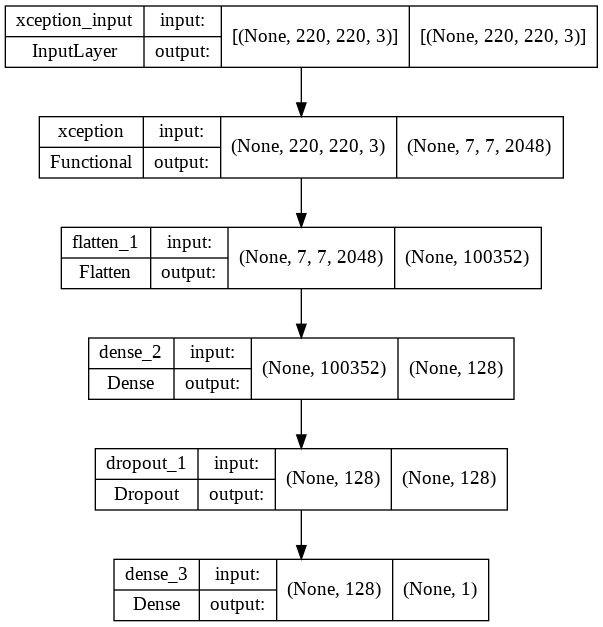

In [20]:
tf.keras.utils.plot_model(xception_adam, to_file='xception_adam.png', show_layer_names=True, show_shapes=True)

In [21]:
hist = xception_adam.fit(train, validation_data=val, epochs=5)


Epoch 1/5
250/250 [==============================] - 102s 397ms/step - loss: 1.5527 - accuracy: 0.4978 - val_loss: 0.6939 - val_accuracy: 0.5125
Epoch 2/5
250/250 [==============================] - 99s 394ms/step - loss: 0.6906 - accuracy: 0.5212 - val_loss: 0.6838 - val_accuracy: 0.5996
Epoch 3/5
250/250 [==============================] - 98s 394ms/step - loss: 0.6805 - accuracy: 0.5520 - val_loss: 0.6549 - val_accuracy: 0.6587
Epoch 4/5
250/250 [==============================] - 99s 395ms/step - loss: 0.6722 - accuracy: 0.5708 - val_loss: 0.6452 - val_accuracy: 0.6426
Epoch 5/5
250/250 [==============================] - 98s 394ms/step - loss: 0.6666 - accuracy: 0.5814 - val_loss: 0.6399 - val_accuracy: 0.6707


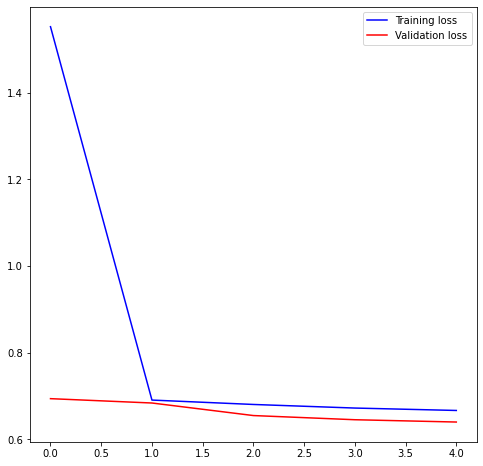

<Figure size 432x288 with 0 Axes>

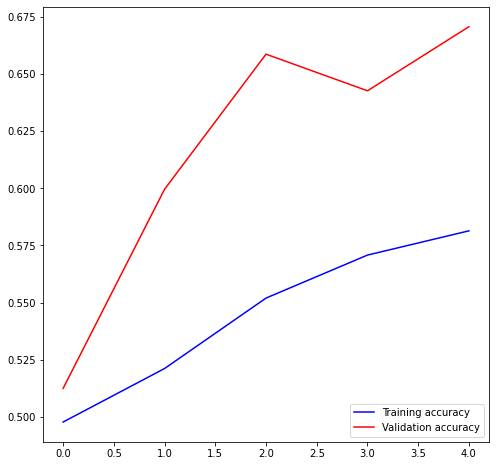

In [22]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [23]:
test_results = xception_adam.evaluate(test)

50/50 [==============================] - 17s 330ms/step - loss: 0.6589 - accuracy: 0.6080


### Inception with "Adam" optimiser

In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import plot_model
inception = InceptionV3(weights = "imagenet", input_shape = (220,220,3), include_top = False)

87924736/87910968 [==============================] - 1s 0us/step


In [25]:
for layer in inception.layers:
    layer.trainable = False
    
inception_adam = Sequential()

inception_adam.add(inception)

for layer in inception.layers:
    layer.trainable = False
    
inception_adam.add(Flatten())

inception_adam.add(Dense(units = 128, activation = "relu"))
inception_adam.add(Dropout(0.5))

inception_adam.add(Dense(units = 1, activation = "sigmoid"))

In [26]:
inception_adam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
inception_adam.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               6553728   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


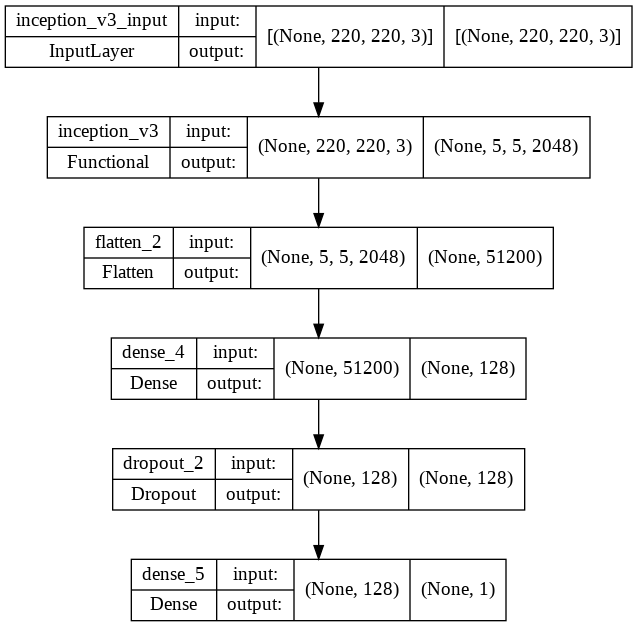

In [27]:
tf.keras.utils.plot_model(inception_adam, to_file='inception_adam.png', show_layer_names=True, show_shapes=True)

In [28]:
hist = inception_adam.fit(train, validation_data=val, epochs=5)


Epoch 1/5
250/250 [==============================] - 104s 398ms/step - loss: 1.3311 - accuracy: 0.5140 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 2/5
250/250 [==============================] - 98s 393ms/step - loss: 0.6935 - accuracy: 0.4964 - val_loss: 0.6930 - val_accuracy: 0.5005
Epoch 3/5
250/250 [==============================] - 98s 392ms/step - loss: 0.6938 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 4/5
250/250 [==============================] - 98s 392ms/step - loss: 0.6930 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 5/5
250/250 [==============================] - 98s 392ms/step - loss: 0.6932 - accuracy: 0.4872 - val_loss: 0.6931 - val_accuracy: 0.5005


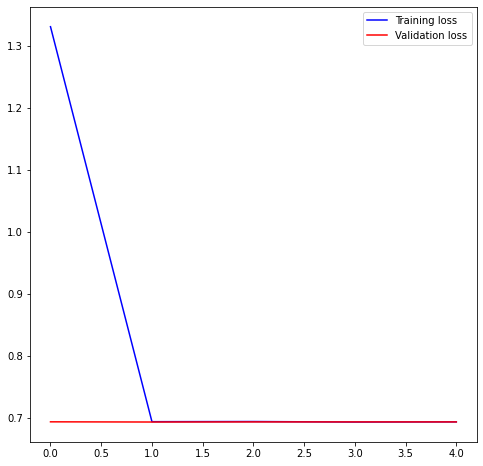

<Figure size 432x288 with 0 Axes>

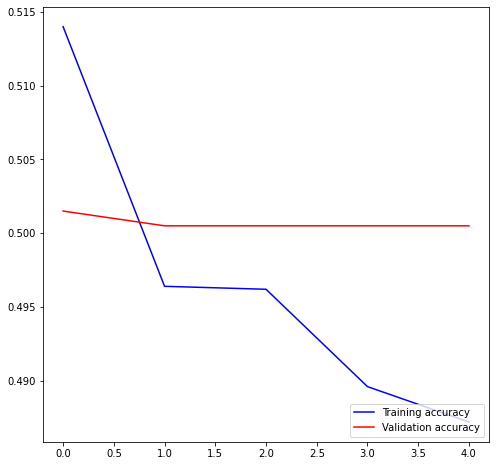

In [29]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [30]:
test_results = inception_adam.evaluate(test)

50/50 [==============================] - 16s 328ms/step - loss: 0.6931 - accuracy: 0.5000


### ResNet50 with "Adamax" optimiser

In [31]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adamax = Sequential()

resnet_adamax.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adamax.add(Flatten())

resnet_adamax.add(Dense(units = 128, activation = "relu"))
resnet_adamax.add(Dropout(0.5))

resnet_adamax.add(Dense(units = 1, activation = "sigmoid"))

In [32]:
resnet_adamax.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])
resnet_adamax.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


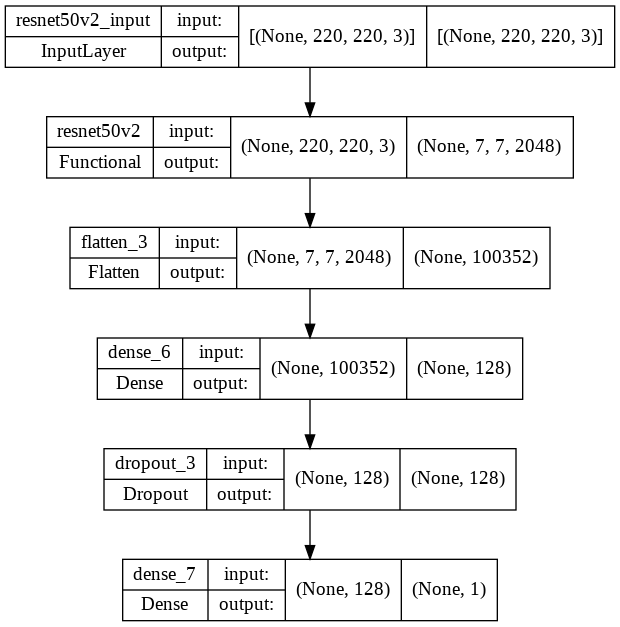

In [33]:
tf.keras.utils.plot_model(resnet_adamax, to_file='resnet_adamax.png', show_layer_names=True, show_shapes=True)

In [34]:
hist = resnet_adamax.fit(train, validation_data=val, epochs=5)

Epoch 1/5
250/250 [==============================] - 102s 396ms/step - loss: 1.3535 - accuracy: 0.5578 - val_loss: 0.6477 - val_accuracy: 0.6597
Epoch 2/5
250/250 [==============================] - 98s 394ms/step - loss: 0.6456 - accuracy: 0.6052 - val_loss: 0.6399 - val_accuracy: 0.6637
Epoch 3/5
250/250 [==============================] - 99s 395ms/step - loss: 0.6123 - accuracy: 0.6518 - val_loss: 0.6216 - val_accuracy: 0.6797
Epoch 4/5
250/250 [==============================] - 99s 396ms/step - loss: 0.5675 - accuracy: 0.6830 - val_loss: 0.6070 - val_accuracy: 0.6987
Epoch 5/5
250/250 [==============================] - 98s 393ms/step - loss: 0.5220 - accuracy: 0.7264 - val_loss: 0.5910 - val_accuracy: 0.6977


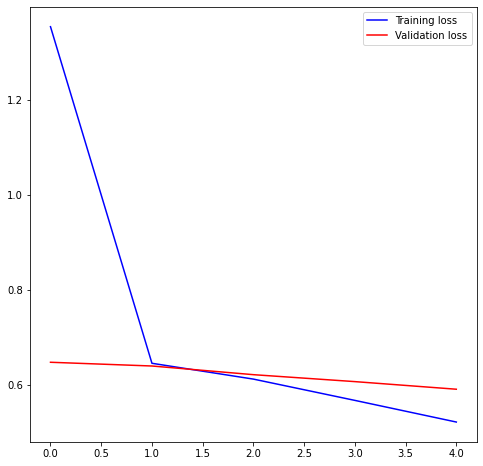

<Figure size 432x288 with 0 Axes>

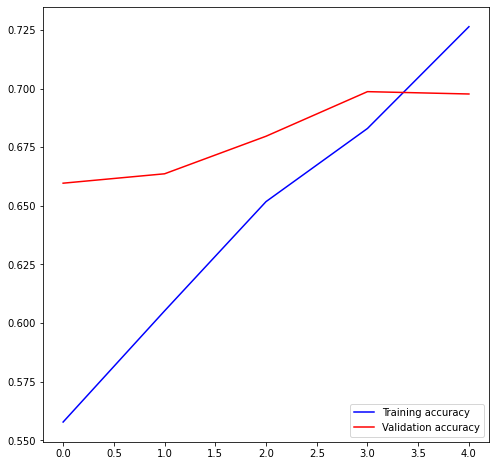

In [35]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [36]:
test_results = resnet_adamax.evaluate(test)

50/50 [==============================] - 16s 328ms/step - loss: 0.6033 - accuracy: 0.6870


### Xception with "Adamax" optimiser

In [37]:
xception = Xception(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in xception.layers:
    layer.trainable = False
    
xception_adamax = Sequential()

xception_adamax.add(xception)

for layer in xception.layers:
    layer.trainable = False
    
xception_adamax.add(Flatten())

xception_adamax.add(Dense(units = 128, activation = "relu"))
xception_adamax.add(Dropout(0.5))

xception_adamax.add(Dense(units = 1, activation = "sigmoid"))

In [38]:
xception_adamax.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])
xception_adamax.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,706,793
Trainable params: 12,845,313
Non-trainable params: 20,861,480
_________________________________________________________________


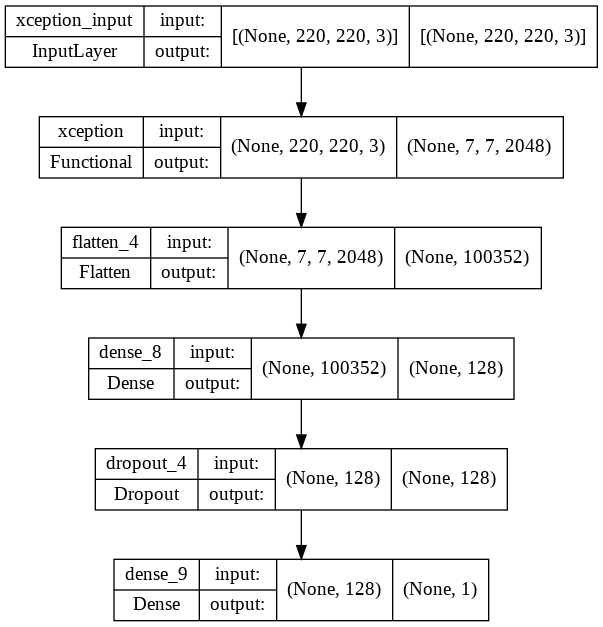

In [39]:
tf.keras.utils.plot_model(xception_adamax, to_file='xception_adamax.png', show_layer_names=True, show_shapes=True)

In [40]:
hist = xception_adamax.fit(train, validation_data=val, epochs=5)

Epoch 1/5
250/250 [==============================] - 101s 396ms/step - loss: 1.4832 - accuracy: 0.5390 - val_loss: 0.6758 - val_accuracy: 0.6186
Epoch 2/5
250/250 [==============================] - 98s 394ms/step - loss: 0.6692 - accuracy: 0.5888 - val_loss: 0.6480 - val_accuracy: 0.6416
Epoch 3/5
250/250 [==============================] - 99s 394ms/step - loss: 0.6533 - accuracy: 0.6218 - val_loss: 0.6130 - val_accuracy: 0.6687
Epoch 4/5
250/250 [==============================] - 99s 398ms/step - loss: 0.6432 - accuracy: 0.6396 - val_loss: 0.6358 - val_accuracy: 0.6697
Epoch 5/5
250/250 [==============================] - 98s 391ms/step - loss: 0.6384 - accuracy: 0.6272 - val_loss: 0.6257 - val_accuracy: 0.6587


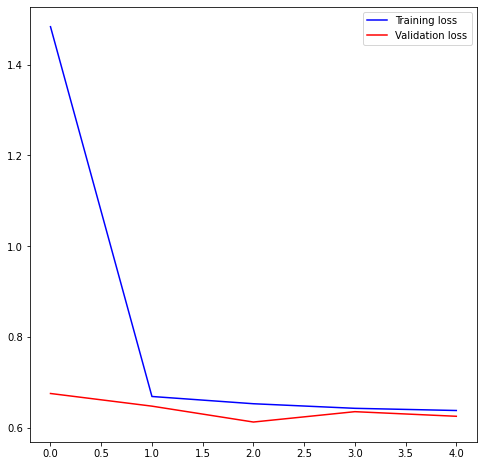

<Figure size 432x288 with 0 Axes>

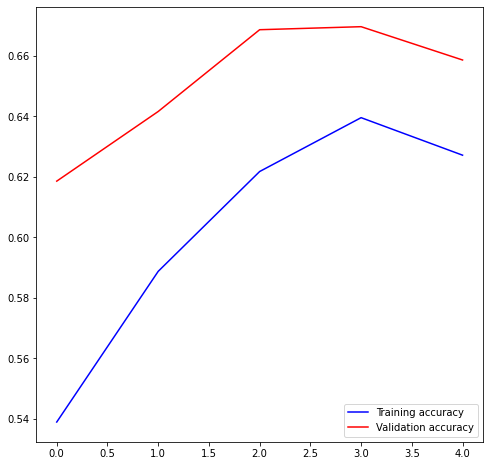

In [41]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [42]:
test_results = xception_adamax.evaluate(test)

50/50 [==============================] - 16s 316ms/step - loss: 0.6323 - accuracy: 0.6360


### Inception with "Adamax" optimiser

In [43]:
inception = InceptionV3(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in inception.layers:
    layer.trainable = False
    
inception_adamax = Sequential()

inception_adamax.add(inception)

for layer in inception.layers:
    layer.trainable = False
    
inception_adamax.add(Flatten())

inception_adamax.add(Dense(units = 128, activation = "relu"))
inception_adamax.add(Dropout(0.5))

inception_adamax.add(Dense(units = 1, activation = "sigmoid"))

In [44]:
inception_adamax.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])
inception_adamax.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


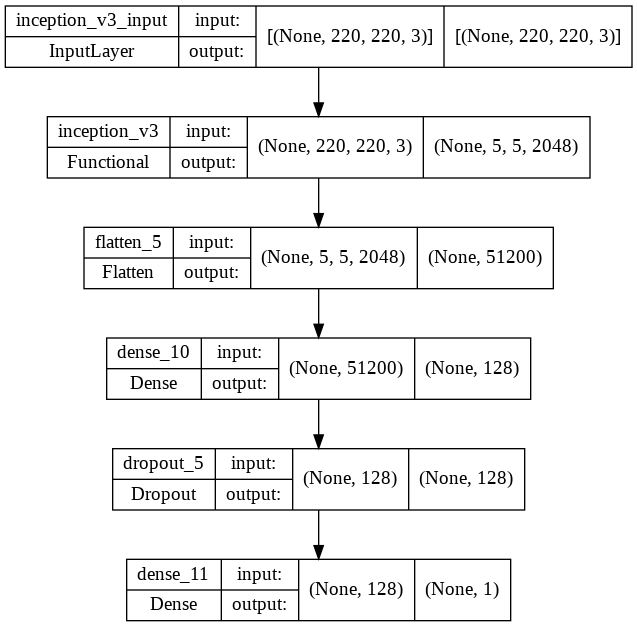

In [45]:
tf.keras.utils.plot_model(inception_adamax, to_file='inception_adamax.png', show_layer_names=True, show_shapes=True)

In [46]:
hist = inception_adamax.fit(train, validation_data=val, epochs=5)

Epoch 1/5
250/250 [==============================] - 99s 379ms/step - loss: 1.6010 - accuracy: 0.5342 - val_loss: 0.6722 - val_accuracy: 0.6376
Epoch 2/5
250/250 [==============================] - 93s 373ms/step - loss: 0.6672 - accuracy: 0.5798 - val_loss: 0.6540 - val_accuracy: 0.6376
Epoch 3/5
250/250 [==============================] - 94s 377ms/step - loss: 0.6542 - accuracy: 0.5974 - val_loss: 0.6353 - val_accuracy: 0.6677
Epoch 4/5
250/250 [==============================] - 94s 374ms/step - loss: 0.6421 - accuracy: 0.6018 - val_loss: 0.6297 - val_accuracy: 0.6436
Epoch 5/5
250/250 [==============================] - 94s 375ms/step - loss: 0.6348 - accuracy: 0.5960 - val_loss: 0.6175 - val_accuracy: 0.6837


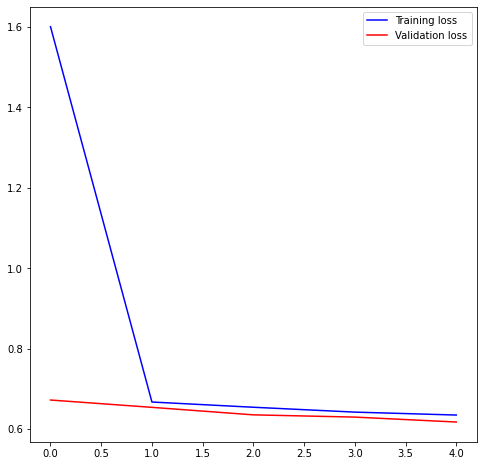

<Figure size 432x288 with 0 Axes>

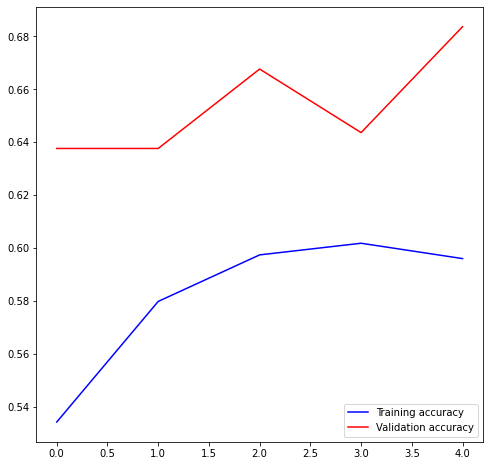

In [47]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [48]:
test_results = inception_adamax.evaluate(test)

50/50 [==============================] - 16s 311ms/step - loss: 0.6381 - accuracy: 0.6290


### ResNet50 with "Nadam" optimiser

In [49]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_nadam = Sequential()

resnet_nadam.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_nadam.add(Flatten())

resnet_nadam.add(Dense(units = 128, activation = "relu"))
resnet_nadam.add(Dropout(0.5))

resnet_nadam.add(Dense(units = 1, activation = "sigmoid"))

In [50]:
resnet_nadam.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])
resnet_nadam.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


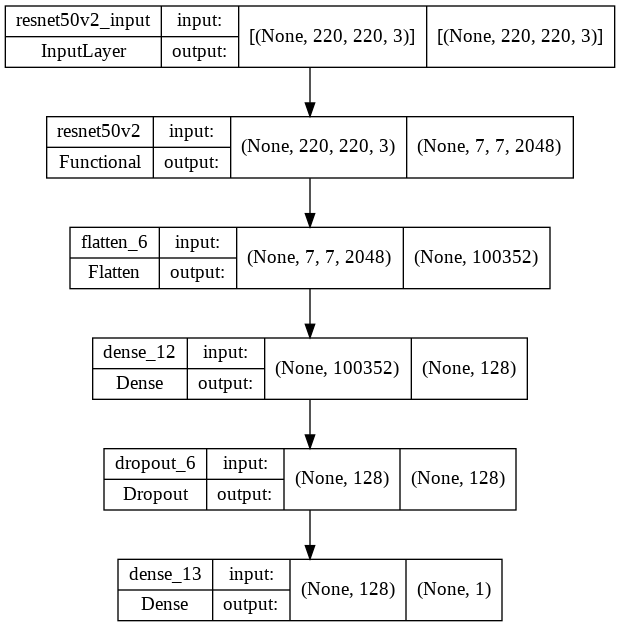

In [51]:
tf.keras.utils.plot_model(resnet_nadam, to_file='resnet_nadam.png', show_layer_names=True, show_shapes=True)

In [52]:
hist = resnet_nadam.fit(train, validation_data=val, epochs=5)

Epoch 1/5
250/250 [==============================] - 96s 373ms/step - loss: 1.1623 - accuracy: 0.5388 - val_loss: 0.6707 - val_accuracy: 0.6436
Epoch 2/5
250/250 [==============================] - 94s 375ms/step - loss: 0.6844 - accuracy: 0.5910 - val_loss: 0.6371 - val_accuracy: 0.6817
Epoch 3/5
250/250 [==============================] - 93s 373ms/step - loss: 0.6585 - accuracy: 0.6354 - val_loss: 0.6738 - val_accuracy: 0.6717
Epoch 4/5
250/250 [==============================] - 93s 372ms/step - loss: 0.6114 - accuracy: 0.6600 - val_loss: 0.5936 - val_accuracy: 0.6937
Epoch 5/5
250/250 [==============================] - 93s 373ms/step - loss: 0.5674 - accuracy: 0.6914 - val_loss: 0.5813 - val_accuracy: 0.6787


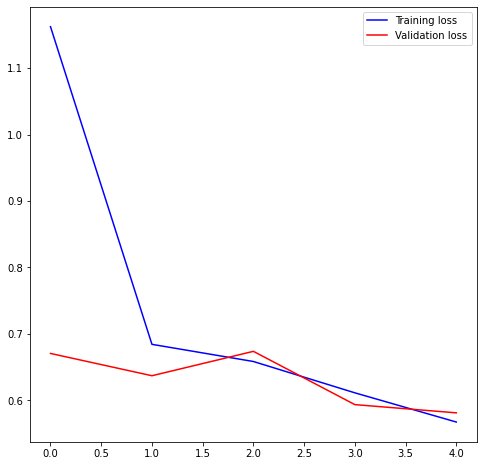

<Figure size 432x288 with 0 Axes>

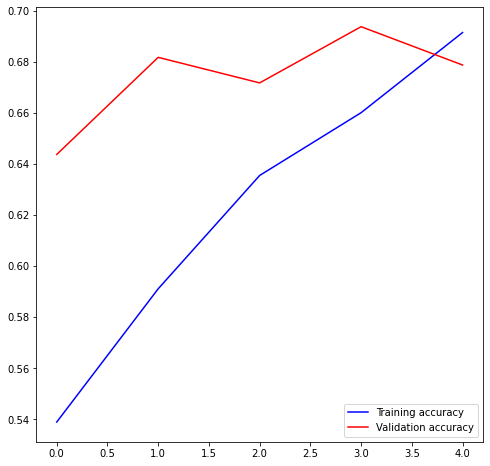

In [53]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [54]:
test_results = resnet_nadam.evaluate(test)

50/50 [==============================] - 16s 310ms/step - loss: 0.6028 - accuracy: 0.6570


### Xception with "Nadam" optimiser

In [55]:
xception = Xception(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in xception.layers:
    layer.trainable = False
    
xception_nadam = Sequential()

xception_nadam.add(xception)

for layer in xception.layers:
    layer.trainable = False
    
xception_nadam.add(Flatten())

xception_nadam.add(Dense(units = 128, activation = "relu"))
xception_nadam.add(Dropout(0.5))

xception_nadam.add(Dense(units = 1, activation = "sigmoid"))

In [56]:
xception_nadam.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])
xception_nadam.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_7 (Flatten)         (None, 100352)            0         
                                                                 
 dense_14 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,706,793
Trainable params: 12,845,313
Non-trainable params: 20,861,480
_________________________________________________________________


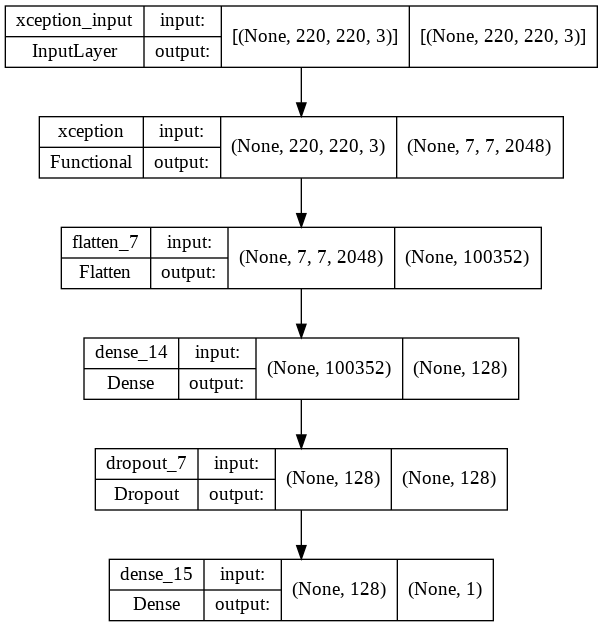

In [57]:
tf.keras.utils.plot_model(xception_nadam, to_file='xception_nadam.png', show_layer_names=True, show_shapes=True)

In [58]:
hist = xception_nadam.fit(train, validation_data=val, epochs=5)

Epoch 1/5
250/250 [==============================] - 97s 377ms/step - loss: 1.0788 - accuracy: 0.5312 - val_loss: 0.6737 - val_accuracy: 0.6086
Epoch 2/5
250/250 [==============================] - 94s 375ms/step - loss: 0.6935 - accuracy: 0.5526 - val_loss: 0.6772 - val_accuracy: 0.6136
Epoch 3/5
250/250 [==============================] - 94s 375ms/step - loss: 0.6798 - accuracy: 0.5786 - val_loss: 0.6500 - val_accuracy: 0.6577
Epoch 4/5
250/250 [==============================] - 93s 374ms/step - loss: 0.6666 - accuracy: 0.5778 - val_loss: 0.6645 - val_accuracy: 0.6306
Epoch 5/5
250/250 [==============================] - 94s 374ms/step - loss: 0.6594 - accuracy: 0.5908 - val_loss: 0.6630 - val_accuracy: 0.6286


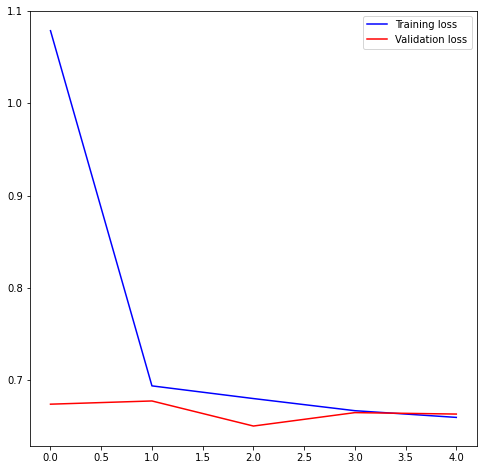

<Figure size 432x288 with 0 Axes>

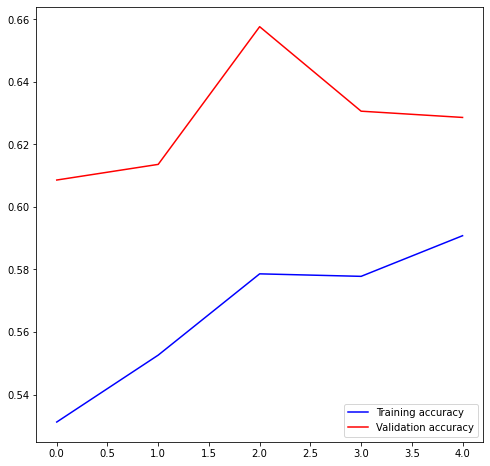

In [59]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [60]:
test_results = xception_nadam.evaluate(test)

50/50 [==============================] - 15s 308ms/step - loss: 0.6580 - accuracy: 0.6400


### Inception with "Nadam" optimiser

In [61]:
inception = InceptionV3(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in inception.layers:
    layer.trainable = False
    
inception_nadam = Sequential()

inception_nadam.add(inception)

for layer in inception.layers:
    layer.trainable = False
    
inception_nadam.add(Flatten())

inception_nadam.add(Dense(units = 128, activation = "relu"))
inception_nadam.add(Dropout(0.5))

inception_nadam.add(Dense(units = 1, activation = "sigmoid"))

In [62]:
inception_nadam.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])
inception_nadam.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


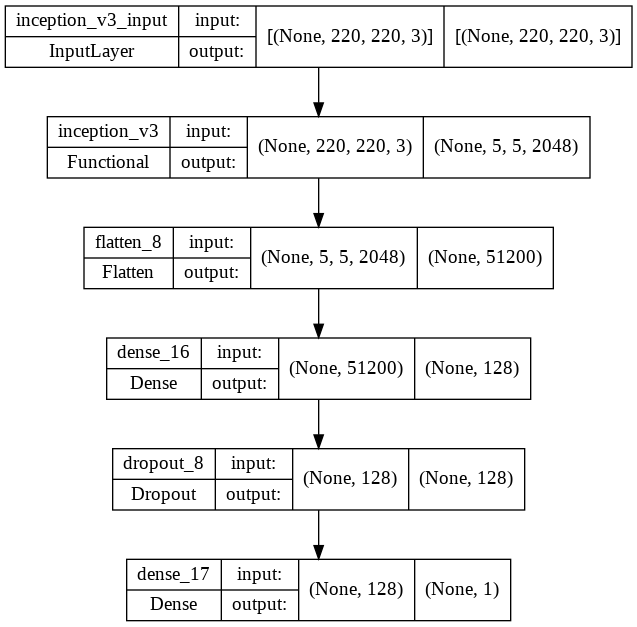

In [63]:
tf.keras.utils.plot_model(inception_nadam, to_file='inception_nadam.png', show_layer_names=True, show_shapes=True)

In [64]:
hist = inception_nadam.fit(train, validation_data=val, epochs=5)

Epoch 1/5
250/250 [==============================] - 99s 381ms/step - loss: 1.2803 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/5
250/250 [==============================] - 94s 374ms/step - loss: 0.7701 - accuracy: 0.4916 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 3/5
250/250 [==============================] - 94s 377ms/step - loss: 0.6935 - accuracy: 0.4916 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 4/5
250/250 [==============================] - 94s 376ms/step - loss: 0.6951 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 5/5
250/250 [==============================] - 93s 374ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5005


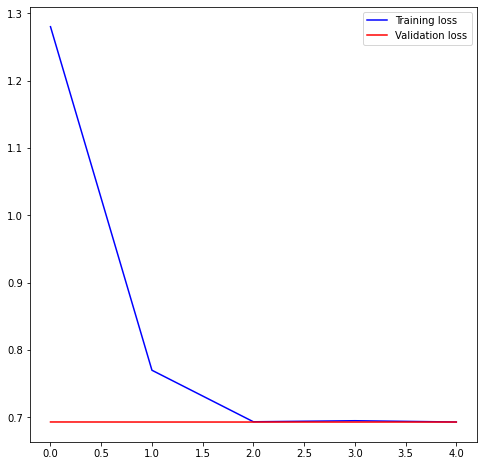

<Figure size 432x288 with 0 Axes>

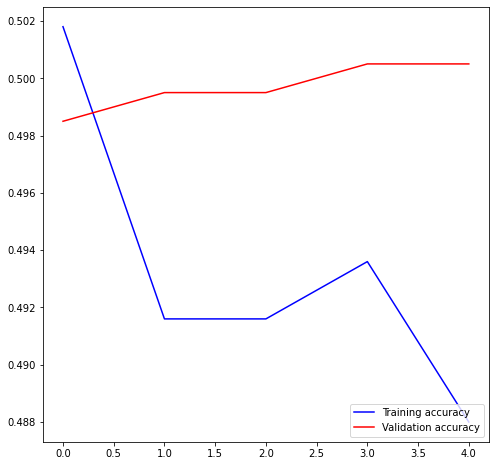

In [65]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [66]:
test_results = inception_nadam.evaluate(test)

50/50 [==============================] - 15s 305ms/step - loss: 0.6931 - accuracy: 0.5000
